# Data Plotting and Fitting Exercise

Here is an example of fitting data using python. 
Here is an outline of the method:
    1. Load needed libraries for analysis and plotting 
    2. Define a fitting function
    3. Load the data file (or define the data manually if easier)
    4. Perform the fit and plot the result
    
Load the needed libraries:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)

Now I will define three different fitting functions:

In [11]:
def linearFit(t, m, b): 
    return m*t + b

def expDecay(t, a, b, c):
    return a*np.exp(-b*t) + c

def gaussianWithOffset(t, a, c, sigma):
    return a*np.exp(-((t-c)**2)/(2*sigma**2))

Now I read in the needed data file; the "skiprows" parameter allows
me to ignore the header line which labels the columns.

In [12]:
data = np.genfromtxt('002Data.txt', skiprows=1)

TypeError: genfromtxt() got an unexpected keyword argument 'skiprows'

This command extracts the first column of data;
python indexes starting at zero, so be careful!

In [13]:
data[ : ,0]  

NameError: name 'data' is not defined

In [14]:
x = data[ : ,0]
z = data[ : ,1]

NameError: name 'data' is not defined

In [15]:
plt.plot(x,z,'o')
plt.show()

NameError: name 'x' is not defined

In [16]:
fitParams, fitCovariances = curve_fit(linearFit, x, z)
print(fitParams)
print(fitCovariances)

NameError: name 'x' is not defined

NameError: name 'x' is not defined

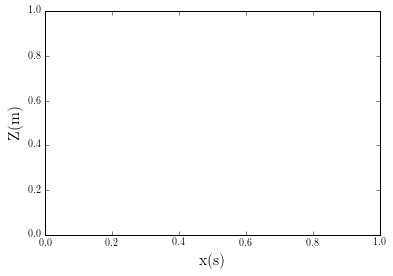

In [9]:
plt.ylabel(r'$\mathrm{Z (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{x (s)}$', fontsize = 16)
#plt.xlim(0,3.5)
# plot the data as red circles with errorbars in the vertical direction
plt.errorbar(x, z, fmt = 'ro', yerr = 0.2)
# now plot the best fit curve and also +- 3 sigma curves
# the square root of the diagonal covariance matrix element 
# is the uncertianty on the corresponding fit parameter.
sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1]])

plt.plot(x, linearFit(x, fitParams[0], fitParams[1]),\
         x, linearFit(x, fitParams[0] + 3*sigma[0], fitParams[1] - 3*sigma[1]),\
         x, linearFit(x, fitParams[0] - 3*sigma[0], fitParams[1] + 3*sigma[1])\
         )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(0.15, 8.0, 
    ("curve fit values:\n m = %.3f\t $\pm$ %.3f\n b = %.3f\t $\pm$ %.3f" 
    % (fitParams[0], sigma[0], fitParams[1], sigma[1])), fontsize=14,bbox=props )

# save plot to a file
plt.savefig('dataFitted.png', bbox_inches=0, dpi=600)
plt.show()